# Section 10 
### Introduction to Data Science EN.553.436/EN.553.636 - Fall 2021
## 1. Support Vector Machines

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import cross_val_score

We will apply SVM methods on the breast cancer data from the sklearn datasets.
We will only focus on the first two features.

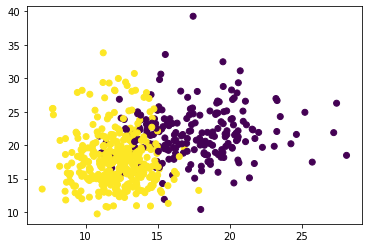

In [4]:
# load data
breast = datasets.load_breast_cancer()
X = breast.data[:,:2]
y = breast.target

# make a scatter plot of the fisrt 2 features 
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

### 1.1 

First perform SVM with linear kernel and C=1, and check the performance of this model by cross validation.

In [5]:
# linear kernel and C=1
lin = svm.SVC(kernel='linear', C=1).fit(X, y)
print('10-fold cross validation with linear kernel: ', np.mean(cross_val_score(lin, X, y, cv=10)))

10-fold cross validation with linear kernel:  0.8839598997493734


Plot the decision boundary and the margins.

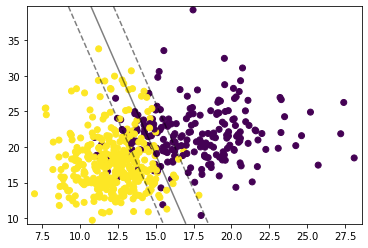

In [6]:
# Create grid to evaluate model
xx = np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 30)
yy = np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = lin.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--']);
plt.scatter(X[:,0], X[:,1], c=y);

### 1.2

SVMs are often particularly powerful if combined with a suitable choice of a kernel, see for example [the documentation of SVC in scikit-learn](https://scikit-learn.org/stable/modules/svm.html#mathematical-formulation) and [here](https://scikit-learn.org/stable/modules/svm.html#kernel-functions).

We now try different kernels that are different from the linear one: Repeat the experiment of 1.1. with a polynomial and radial basis function (RBF) kernel, with the same C=1.

10-fold cross validation with polynomial kernel:  0.8980576441102756


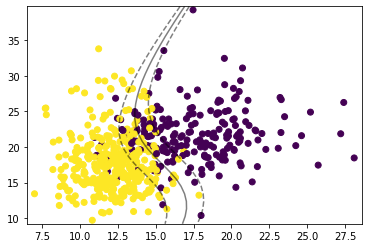

In [6]:
# Polynomial kernel
poly = svm.SVC(kernel='poly', C=1).fit(X, y)
print('10-fold cross validation with polynomial kernel: ', np.mean(cross_val_score(poly, X, y, cv=10)))

xx = np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 30)
yy = np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = poly.decision_function(xy).reshape(XX.shape)

plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--']);
plt.scatter(X[:,0], X[:,1], c=y);

10-fold cross validation with rbf kernel:  0.9033208020050125


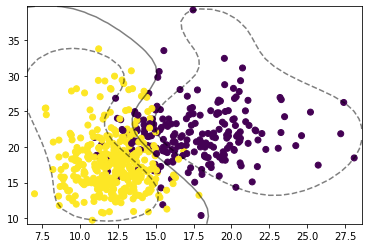

In [7]:
# RBF kernel
rbf = svm.SVC(kernel='rbf', C=1).fit(X, y)
print('10-fold cross validation with rbf kernel: ', np.mean(cross_val_score(rbf, X, y, cv=10)))

xx = np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 30)
yy = np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = rbf.decision_function(xy).reshape(XX.shape)

plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--']);
plt.scatter(X[:,0], X[:,1], c=y);

### 1.3 

We will show how the parameter gamma affects the SVM model with rbf kernel.

#### 1.3.1 

Repeat the same steps for `gamma='auto'`, `gamma=10`, `gamma=50`. What are the differences? <br>

#### 1.3.2 

Explain how gamma effects the model performance. <br>
- Recall that `gamma='auto'` chooses its value as $\frac{1}{\text{number of features}}$ (which is 0.5 here for only 2 features). 


10-fold cv with rbf kernel and gamma=auto: 0.8804197994987468


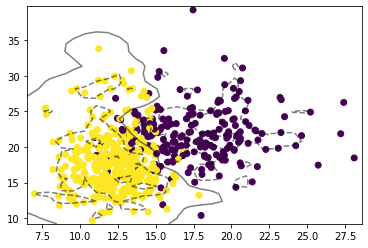

In [8]:
# RBF with gamma='auto'
rbf_auto = svm.SVC(kernel='rbf', C=1,gamma='auto').fit(X, y)
print('10-fold cv with rbf kernel and gamma=auto:', np.mean(cross_val_score(rbf_auto, X, y, cv=10)))
xx = np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 30)
yy = np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = rbf_auto.decision_function(xy).reshape(XX.shape)

plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--']);
plt.scatter(X[:,0], X[:,1], c=y);

10-fold cv with rbf kernel and gamma=10: 0.7696741854636591


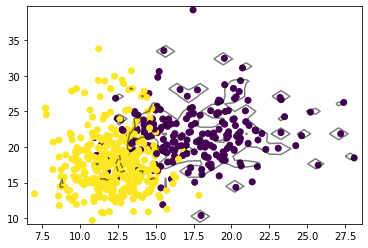

In [9]:
# RBF with gamma=10
rbf_10 = svm.SVC(kernel='rbf', C=1,gamma=10).fit(X, y)
print('10-fold cv with rbf kernel and gamma=10:', np.mean(cross_val_score(rbf_10, X, y, cv=10)))
xx = np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 30)
yy = np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = rbf_10.decision_function(xy).reshape(XX.shape)

plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--']);
plt.scatter(X[:,0], X[:,1], c=y);

10-fold cv with rbf kernel and gamma=10: 0.6502819548872181


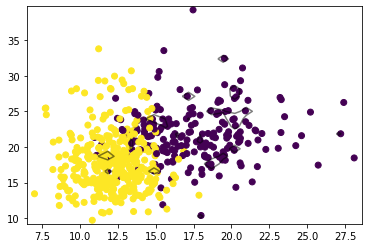

In [11]:
# RBF with gamma=50
rbf_100 = svm.SVC(kernel='rbf', C=1,gamma=50).fit(X, y)
print('10-fold cv with rbf kernel and gamma=10:', np.mean(cross_val_score(rbf_100, X, y, cv=10)))
xx = np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 30)
yy = np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = rbf_100.decision_function(xy).reshape(XX.shape)

plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--']);
plt.scatter(X[:,0], X[:,1], c=y);

##### Answer to 1.3.2: When gamma increases, the SVM model overfits heavily, as the plot shows, and the cross validation scores decreases.

## 2. k-Means clustering 

### 2.1 

Perform k-Means clustering on the same dataset as above.

- Print the SSE and the clustering plot.
- Set `init='random'`.

SSE for k-Means model:  9403.76824064772


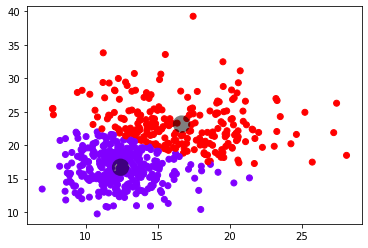

In [10]:
from sklearn.cluster import KMeans

kmeans = KMeans(init='random', n_clusters=2, n_init=100)
kmeans.fit(X)
print('SSE for k-Means model: ', kmeans.inertia_)

plt.scatter(X[:,0],X[:,1],c=kmeans.labels_,cmap=plt.cm.rainbow);

C = kmeans.cluster_centers_
plt.scatter(C[:,0],C[:,1],c='k',marker='o',s=300,alpha=0.5,edgecolor='none');

### 2.2 Now run the k-Means for different number of clusters.


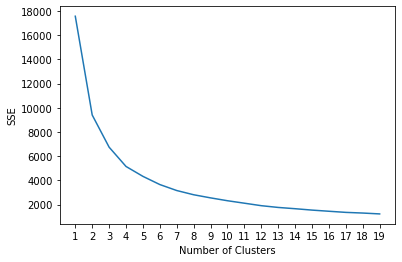

In [11]:
sse = []
L = range(1,20)
for k in L:
    kmeans = KMeans(n_clusters=k, n_init=100, init='random')
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
    
plt.plot(L, sse)
plt.xticks(L)
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

#### The SSE keeps decreasing as number of clusters increases, but does it mean the larger the k, the better the model?

### 2.3 

To determine the optimal choice of $k$ for our model, we implement *silhouette analysis*.

Some reference: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

For number of clusters $k$ in range(2,15), perform and plot the average silhouette score over the range of k.
<br> 
Print the optimal k with the highest average silhouette score.

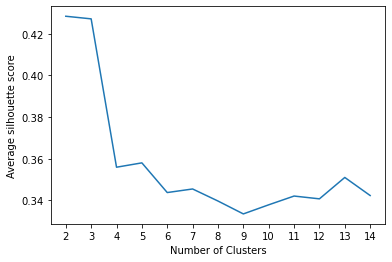

n_clusters = 2 is the best here with the average silhouette_score : 0.42845134344963703


In [12]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette=[]
L = range(2,15)
for k in L:
    kmeans = KMeans(n_clusters=k, random_state=10)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette.append(silhouette_avg)
sil_max = np.max(silhouette)
k_optimal = L[silhouette.index(sil_max)]
plt.plot(L, silhouette)
plt.xticks(L)
plt.xlabel("Number of Clusters")
plt.ylabel("Average silhouette score")
plt.show()
print("n_clusters =",k_optimal,"is the best here with the average silhouette_score :",sil_max)